# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [77]:
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

In [144]:
!ls

Employee.csv    Orders.csv      Temp_States.csv main.ipynb


In [66]:
# import libraries here
employee = pd.read_csv('./Employee.csv')
orders = pd.read_csv('./Orders.csv')
temp = pd.read_csv('./Temp_States.csv')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

#### Print `temp`

In [19]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [20]:
# your answer here
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [41]:
# your answer here
ny = temp.loc[(temp["State"] == "New York")]
ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [31]:
# your answer here
ny.mean()

Temperature    10.740741
dtype: float64

#### We want to know cities and states with Temperature above 15 degress Celcius

In [39]:
# your answer here
temp_C = temp.loc[(temp["Temperature"] > 15)]
temp_C

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [44]:
# your answer here
temp_C1 = temp.loc[(temp["Temperature"] > 15)].drop("State", axis=1)
temp_C1

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222
5,Treton,22.222222
6,Newark,20.000000


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [166]:
# your answer here
temp_C2 = temp.loc[(temp["Temperature"] > 15) & (temp["Temperature"] < 20)].drop("State", axis=1)
temp_C2

,City,Temperature
0,NYC,19.444444
3,Hartford,17.222222


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [65]:
# your answer here
conn = temp.loc[(temp["State"] == "Connecticut")]
nj = temp.loc[(temp["State"] == "New Jersey")]
###
print(f'New York Mean {ny.mean()} \n New York Std {ny.std()}')
print('-----------------------------------------')
print(f'Connecticut Mean {conn.mean()} \n Connecticut Std {conn.std()}')
print('-----------------------------------------')
print(f'New Jersey Mean {nj.mean()} \n New Jersey Std {nj.std()}')

New York Mean Temperature    10.740741
dtype: float64 
 New York Std Temperature    8.133404
dtype: float64
-----------------------------------------
Connecticut Mean Temperature    15.833333
dtype: float64 
 Connecticut Std Temperature    1.964186
dtype: float64
-----------------------------------------
New Jersey Mean Temperature    21.111111
dtype: float64 
 New Jersey Std Temperature    1.571348
dtype: float64


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [67]:
# your answer here
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Explore the data types of the Temp dataframe. Comment your results

In [68]:
# your answer here
employee.dtypes

Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

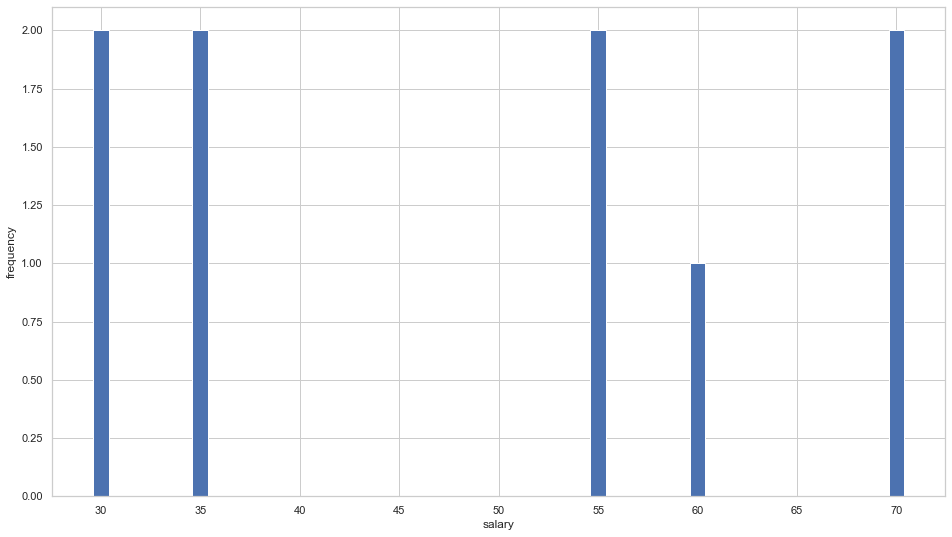

In [80]:
# your answer here
freq = employee["Salary"].value_counts().to_dict()

plt.bar(x=freq.keys(),
        height=freq.values())
plt.xlabel('salary')
plt.ylabel('frequency')
plt.show()

# The histogram shows how many times (frequency) these salaries are given in this company:

#### What's the average salary in this company?

In [91]:
# your answer here
# employee.mean(axis=1, level='Salary') <--- This code printed the following error and I don't know why: "level name Salary is not the name of the columns"
employee.mean()

Years      4.111111
Salary    48.888889
dtype: float64

#### What's the highest salary?

In [86]:
# your answer here
employee.max()
# There's two highest salaries with the same amount.

Name              Sonia
Department        Sales
Education           Phd
Gender                M
Title         associate
Years                 8
Salary               70
dtype: object

#### What's the lowest salary?

In [87]:
# your answer here
employee.min()
# Here there's two lowest salaries with the same amount too.

Name               Ana
Department          HR
Education     Bachelor
Gender               F
Title               VP
Years                1
Salary              30
dtype: object

#### Who are the employees with the lowest salary?

In [100]:
# your answer here
employee[employee.Salary == employee.Salary.min()]

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [107]:
# your answer here
employee.loc[(employee.Name == "David")]

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [113]:
# your answer here
employee.loc[(employee.Name == "David")].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [110]:
# your answer here
employee.loc[(employee.Title == "associate")]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [115]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [116]:
# your answer here- 2nd method
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [117]:
# your answer here
employee.loc[(employee["Title"] == "associate") & (employee["Salary"] > 55)]

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [187]:
# your answer here
employee["Years"].value_counts(bins=4)

(0.992, 2.75]    4
(6.25, 8.0]      3
(2.75, 4.5]      2
(4.5, 6.25]      0
Name: Years, dtype: int64

####  What is the average Salary per title?

In [128]:
# your answer here
an = employee.loc[(employee.Title == "analyst")].Salary
assoc = employee.loc[(employee.Title == "associate")].Salary
vp = employee.loc[(employee.Title == "VP")].Salary
###
print(f'Analyst average salary: {an.mean()}')
print(f'Associate average salary: {assoc.mean()}')
print(f'VP average salary: {vp.mean()}')

Analyst average salary: 32.5
Associate average salary: 56.666666666666664
VP average salary: 70.0


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

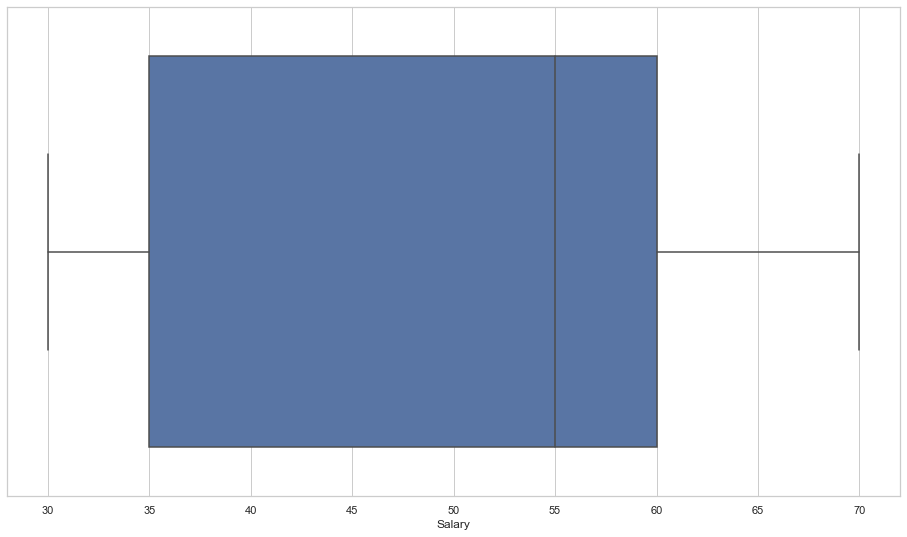

In [131]:
# draw boxplot here
sns.boxplot(x="Salary", data=employee)

In [134]:
# print first quartile here
employee.quantile(0.25).Salary

35.0

In [135]:
# print third quartile here
employee.quantile(0.75).Salary

60.0

#### Is the mean salary per gender different?

In [143]:
# your answer here
m = employee.loc[(employee.Gender == "M")].Salary
f = employee.loc[(employee.Gender == "F")].Salary

print(f'Average male salary: {m.mean()} \nAverage female salary: {f.mean()}')

Average male salary: 50.0 
Average female salary: 47.5


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [30]:
# your answer here


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [148]:
# your answer here

# Got rid of that unexpected and unnecessary colum:
orders.drop("Unnamed: 0", axis=1, inplace=True)

In [220]:
orders.sample(5)

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
354960,577406,23439,2011,11,7,10,hand warmer red love heart,12,2011-11-20 10:36:00,2.10,12702,Germany,25.20
326403,574714,22840,2011,11,7,14,round cake tin vintage red,1,2011-11-06 14:29:00,7.95,15427,United Kingdom,7.95
10060,537594,22846,2010,12,2,12,bread bin diner style red,4,2010-12-07 12:28:00,14.95,12647,Germany,59.80
49014,543008,20727,2011,2,3,13,lunch bag black skull.,20,2011-02-02 13:07:00,1.65,13824,United Kingdom,33.00
254623,568049,82001S,2011,9,5,12,vinyl record frame silver,2,2011-09-23 12:38:00,3.75,17841,United Kingdom,7.50


#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [149]:
# your answer here
orders.dtypes

InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object

In [150]:
# your answer here
orders.describe()

,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [155]:
# your answer here
orders.amount_spent.mean()

22.394748504739596

#### What were the highest and lowest purchase prices? 

In [159]:
# your answer here
print(f'Highest: {orders.amount_spent.max()}\nLowest: {orders.amount_spent.min()}')

Highest: 168469.6
Lowest: 0.0


#### Select all the customers we have in Spain

In [163]:
# your answer here
spain = orders.loc[(orders["Country"] == "Spain")]
spain

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [165]:
# your answer here
spain.Country.value_counts()

Spain    2485
Name: Country, dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [195]:
# your answer here
df = orders.CustomerID.value_counts().to_frame()
df.loc[(df["CustomerID"] > 50)]

,CustomerID
17841,7847
14911,5677
14096,5111
12748,4596
14606,2700
...,...
17383,51
13336,51
15192,51
15579,51


#### Select orders from Spain that are above 50 items

In [193]:
# your answer here
spain.loc[(orders["Quantity"] > 50)]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
32454,540785,84997B,2011,1,2,11,red 3 piece retrospot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
32455,540785,84997D,2011,1,2,11,pink 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32456,540785,84997C,2011,1,2,11,blue 3 piece polkadot cutlery set,360,2011-01-11 11:39:00,3.39,12557,Spain,1220.40
32457,540785,84997A,2011,1,2,11,green 3 piece polkadot cutlery set,144,2011-01-11 11:39:00,3.39,12557,Spain,488.16
91155,547972,22383,2011,3,1,16,lunch bag suki design,150,2011-03-28 16:41:00,1.45,12557,Spain,217.50


#### Select all free orders

In [196]:
# your answer here
orders.loc[(orders["amount_spent"] == 0)]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
34494,541109,22168,2011,1,4,15,organiser wood antique white,1,2011-01-13 15:10:00,0.0,15107,United Kingdom,0.0
53788,543599,84535B,2011,2,4,13,fairy cakes notebook a6 size,16,2011-02-10 13:08:00,0.0,17560,United Kingdom,0.0
85671,547417,22062,2011,3,3,10,ceramic bowl with love heart design,36,2011-03-23 10:25:00,0.0,13239,United Kingdom,0.0
92875,548318,22055,2011,3,3,12,mini cake stand hanging strawbery,5,2011-03-30 12:45:00,0.0,13113,United Kingdom,0.0
97430,548871,22162,2011,4,1,14,heart garland rustic padded,2,2011-04-04 14:42:00,0.0,14410,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [237]:
# your answer here
orders.loc[orders["Description"].str.contains('lunch bag')]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [238]:
year = orders.loc[(orders["year"] == 2011) & (orders["Description"].str.contains('lunch bag'))]
year

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

In [199]:
# your answer here
freq_S = spain["amount_spent"].value_counts().to_dict()
freq_S

{15.0: 186,
 17.700000000000006: 122,
 19.8: 99,
 17.4: 86,
 10.2: 76,
 30.0: 59,
 14.85: 56,
 16.5: 56,
 12.6: 50,
 10.5: 43,
 13.2: 41,
 5.04: 39,
 9.9: 38,
 17.0: 35,
 15.3: 34,
 15.9: 33,
 23.4: 31,
 19.9: 28,
 12.5: 24,
 12.75: 24,
 20.4: 24,
 25.5: 23,
 10.08: 21,
 16.95: 20,
 8.5: 20,
 7.5: 20,
 5.9: 19,
 3.75: 19,
 7.800000000000002: 18,
 19.5: 17,
 2.95: 17,
 17.85: 17,
 3.3: 16,
 25.200000000000006: 16,
 39.6: 16,
 9.95: 16,
 2.5: 16,
 22.5: 15,
 28.0: 15,
 16.6: 15,
 1.25: 15,
 9.96: 15,
 2.55: 15,
 5.1: 15,
 84.0: 14,
 4.95: 13,
 29.700000000000006: 13,
 4.68: 12,
 6.6: 12,
 35.40000000000001: 12,
 13.5: 12,
 20.8: 12,
 24.96: 12,
 2.08: 11,
 1.65: 11,
 56.0: 11,
 15.6: 11,
 11.7: 10,
 10.0: 10,
 7.95: 10,
 2.9: 9,
 12.48: 9,
 8.7: 9,
 5.0: 9,
 1.95: 9,
 13.919999999999998: 9,
 17.34: 9,
 4.15: 9,
 11.8: 9,
 1.45: 9,
 6.959999999999999: 8,
 1.3: 8,
 45.0: 8,
 14.75: 8,
 19.92: 8,
 9.36: 8,
 20.85: 8,
 30.6: 7,
 1.7: 7,
 13.52: 7,
 4.25: 7,
 39.8: 7,
 3.9: 7,
 67.6: 7,
 15.8

#### Select all orders made in the month of August

In [230]:
# your answer here
orders.loc[(orders.month == 8)]

,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [233]:
# your answer here
orders.loc[(orders.month == 8) & orders.Country]

AttributeError: 'DataFrame' object has no attribute 'values_count'

#### What's the  average amount of money spent by country

In [ ]:
# your answer here
count = orders.loc[(orders.Country == )]

#### What's the most expensive item?

In [235]:
orders.UnitPrice.max()

8142.75

#### What was the average amount spent per year ?

In [236]:
# your answer here
orders.loc[(orders.amount_spent)].year

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Float64Index([ 15.3, 20.34, 20.34, 20.34,  15.3,\n              ...\n               10.2,  12.6,  16.6,  16.6, 14.85],\n             dtype='float64', length=346148). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"